<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/log/balances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data=pd.read_csv(url)
data.head(10)

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
5,0,1,919.588530,7491.558572
6,0,0,825.513331,24905.226578
7,0,1,808.667504,17600.451344
8,0,0,1161.057854,37468.529288
9,0,0,0.000000,29275.268293


In [3]:
len(data.index)

10000

In [4]:
X = data[['student', 'balance','income']]
y = data['default']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [6]:
log_regression = LogisticRegression()

In [7]:
log_regression.fit(X_train,y_train)

LogisticRegression()

In [8]:
y_pred = log_regression.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
#MODEL DIAGNOSTICS
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2878,    9],
       [  74,   39]])

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9723333333333334


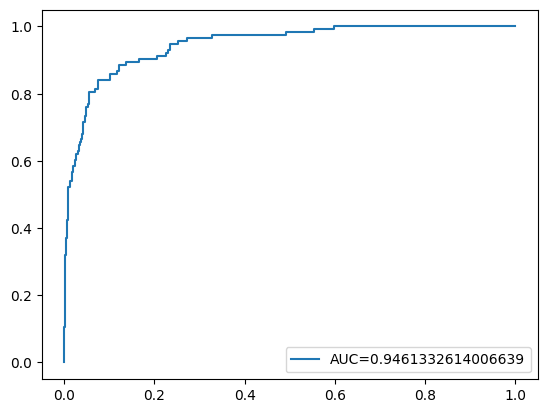

In [11]:
#plot ROC curve
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [12]:
pred = log_regression.predict([[0,729.526495,44361.625074]])
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])